## Aufgabe 1 - NMO-Geschwindigkeit

Die folgende Abbildung zeigt im linken Teil ein Beispielseimsogramm einer Reflexionsseismik. Dieses Seismogramm soll im folgenden NMO-korrigiert werden. Dazu benötigt man die NMO-Velocity. Berechnen Sie mithilfe des Seismogramms die NMO-Velocity und geben Sie Sie in das Programm ein. Der mittlere Plot zeigt dann das NMO-korrigierte Seismogramm, der rechte Plot eine Stapelung (Stack) aller NMO-korrigierten Spuren. Die Summenspur sollte einen klaren Peak haben. 


Ersteinsatz bei x=0m 0.1000s, Ersteinsatz bei x=200m 0.1667s


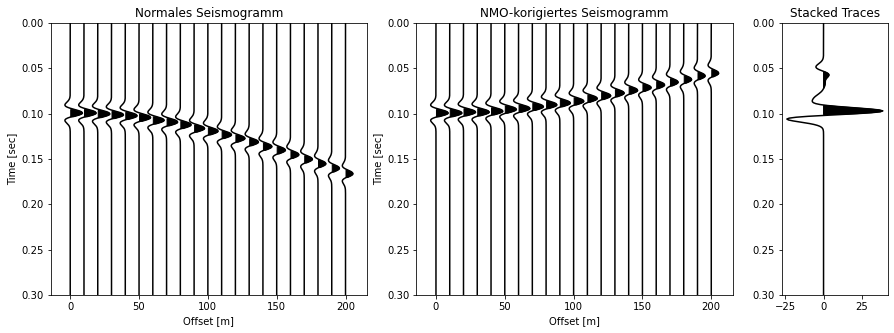

In [44]:
'''
    Dieses Skript berechnet synthetische Seismogramme und führt anschließend eine NMO-Korrektur durch
    © Nepomuk Boitz, July 2020, boitz@geophysik.fu-berlin.de
'''


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


def wavelet(nT,dT,fdom):

    T = np.linspace(-nT*dT/2,nT*dT/2,nT);
    w = (2/np.sqrt(3*(1/fdom))*np.pi**(1/4)) *(1-(T**2/(1/fdom)**2)) * np.exp(-(T**2/(2*(1/fdom)**2)));
    return w

def plot_trace(A,t,x,w,ax):
    trace = x*np.ones(501)   
    trace[int(t*1000-len(w)/2):int(t*1000+len(w)/2)] = w*A + x
    time = np.linspace(0,.5,501)
    ax.plot(trace,time,'k-')
    ax.fill_betweenx(time,x,trace,where=(trace>x),color='k')
    return trace
   
    
## Geben Sie hier ihre NMO-Velocity ein - der voreingestellte Wert von 900m/s ist offensichtlich falsch !
    
v_NMO = 900
y_limits = [0.0,0.3] # Hiermit kann man den Bildausschnitt anpassen, in dem Fall von 0-0.3s. Um die 
#Ersteinsätze besser ablesen zu können, können SIe damit bei Bedarf in den plot 'reinzoomen'



## Ab hier nichts mehr verändern !

sum_trace = np.zeros(501)
fig = plt.figure(figsize=(15, 5)) 
gs = gridspec.GridSpec(1, 3, width_ratios=[3,3, 1])
v_or = 1500
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])
z = 75
w = wavelet(51,.001,200)
times = np.zeros(21)



for idx,x in enumerate(np.linspace(0,200,21)):
    r = 2*np.sqrt((x/2)**2 + z**2)
    t = r/v_or
    A = 60/r
    plot_trace(A,t,x,w,ax0)
    dt = 2*np.sqrt((x/2)**2 + z**2)/v_NMO - 2*z/v_NMO
    trace = plot_trace(A,t-dt,x,w,ax1)
    sum_trace = sum_trace + trace -x
    times[idx] = t

time = np.linspace(0,.5,501)

ax2.plot(sum_trace,time,'k-')
ax2.fill_betweenx(time,0,sum_trace,where=(sum_trace>0),color='k')

ax0.set_ylabel('Time [sec]')
ax0.set_xlabel('Offset [m]')
ax0.set_title('Normales Seismogramm')

ax1.set_ylabel('Time [sec]')
ax1.set_xlabel('Offset [m]')
ax1.set_title('NMO-korigiertes Seismogramm')
           
ax0.set_ylim(y_limits)
ax1.set_ylim(y_limits)
ax2.set_ylim(y_limits)


ax0.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()
ax2.set_title('Stacked Traces')
print('Ersteinsatz bei x=0m %.4fs, Ersteinsatz bei x=200m %.4fs'%(times[0],times[-1]))
plt.show()
